In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
samples = 1000 # 0.1 second between each sample so this corresponds to 100 seconds.
tau = 100

In [3]:
def gen_action_wave(tau, dt, max_thrust, max_waves):
    # Sample the number of sin waves.
    # Based on the number sample a number of 
    # scaling and width for every waves.
    samples = int(tau/dt)
    t = np.linspace(0, tau, samples)
    nb_waves = np.random.randint(max_waves)
    scaling = np.random.uniform(-max_thrust, max_thrust, nb_waves)
    width = np.random.uniform(0, tau, nb_waves)
    arg = t[None] / width[..., None]
    wave = (scaling[..., None] * np.sin(np.pi*arg)).sum(0)
    wave = np.clip(wave, -max_thrust, max_thrust)
    return wave

def gen_action_cst(tau, dt, max_thrust):
    samples = int(tau/dt)
    force = np.random.uniform(-max_thrust, max_thrust)
    return np.ones(shape=(samples,))*force

def gen_action(tau, dt, max_thrust):
    nu = np.random.uniform()
    if nu < 0.2:
        return gen_action_cst(tau, dt, max_thrust)
    return gen_action_wave(tau, dt, max_thrust, 10)

def gen_actions(tau, dt, max_thrusts):
    forces = np.zeros(shape=(int(tau/dt), 6))
    forces[:, 0] = gen_action(tau, dt, max_thrusts[0])
    forces[:, 1] = gen_action(tau, dt, max_thrusts[1])
    forces[:, 5] = gen_action(tau, dt, max_thrusts[2])
    return forces

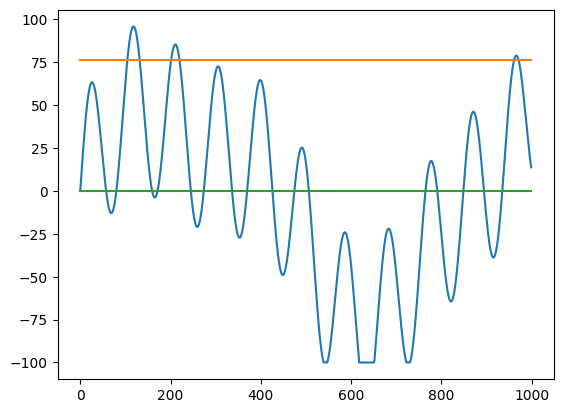

In [4]:
tau = 100
dt = 0.1
max_thrusts = [100, 100, 70]
tensor = gen_actions(tau, dt, max_thrusts)

plt.plot(tensor[:, 0])
plt.plot(tensor[:, 1])
plt.plot(tensor[:, 5])

In [5]:
def gen_action_wave_fct(tau, max_thrust, max_waves):
    # Sample the number of sin waves.
    # Based on the number sample a number of 
    # scaling and width for every waves.
    nb_waves = np.random.randint(max_waves)
    s = np.random.uniform(-max_thrust, max_thrust, nb_waves)
    w = np.random.uniform(0, tau, nb_waves)
    return lambda t: np.clip((s * np.sin(np.pi/w*t)).sum(), -max_thrust, max_thrust)

def gen_action_cst_fct(max_thrust):
    force = np.random.uniform(-max_thrust, max_thrust)
    return lambda t: force

def gen_action_fct(tau, dt, max_thrust):
    nu = np.random.uniform()
    if nu < 0.2:
        return gen_action_cst_fct(max_thrust)
    return gen_action_wave_fct(tau, max_thrust, 10)

def gen_actions_fct(tau, dt, max_thrusts):
    Fx = gen_action_fct(tau, dt, max_thrusts[0])
    Fy = gen_action_fct(tau, dt, max_thrusts[1])
    Tz = gen_action_fct(tau, dt, max_thrusts[2])
    return lambda t: np.array([Fx(t), Fy(t), 0., 0., 0., Tz(t)])
    

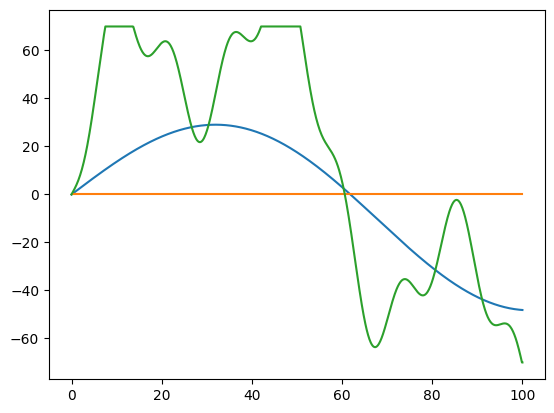

In [12]:
actions_fct = gen_actions_fct(tau, dt, max_thrusts)
forces = []
spawn = tau
time = np.linspace(0, spawn, int(spawn/dt))
for t in time:
    forces.append(actions_fct(t)[None])

forces = np.concatenate(forces, axis=0)

plt.plot(time, forces[:, 0])
plt.plot(time, forces[:, 1])
plt.plot(time, forces[:, 5])